In [73]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# resolution of the image (square)
image_res = 256

# move the CAMERA (so the image moves in the opposite direction):
#                   + centy
#                                  0 on both
#                       ^       _______________
#                       |     /
#                       |   /
#                       | /
# - centx   <-----------+----------->   + centx
#                       |
#                       |
#                       |
#                       v
#                    - centy

image_center_x = 0
image_center_y = 0

# zoom the image in and out
#  - zoom   /   zoom in                       zoom out   /   + zoom
#          ●        ●        •        •        ·        ·
#         <----------------------+----------------------->
#                               /
#                             /
#                ___________/
#                 zoom of 1
zoom_factor = 1

In [75]:
# define the network
# some key points:
# 1: adding more layers results in a more complex / detailed image
# 2: making bigger layers usually results in a more sharp image / less cloudy
# 3: initianlizing random weights between a custom range makes the image more colorful (on default range they are grey)
# 4: using different activation funcs results in different images, fo example using linear functions results in linear images, etc...
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # def layers
        # input layer has to have 2 neurones, for x and y cords
        # output layer has to have 3 neurones, for RGB values
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc4 = nn.Linear(50, 50)
        self.fc5 = nn.Linear(50, 50)
        self.fc6 = nn.Linear(50, 50)
        self.fc7 = nn.Linear(50, 50)
        self.fc8 = nn.Linear(50, 3)
        
        # set custom weight initialization range
        nn.init.uniform_(self.fc1.weight, a=-1, b=1)
        nn.init.uniform_(self.fc2.weight, a=-1, b=1)
        nn.init.uniform_(self.fc3.weight, a=-1, b=1)
        nn.init.uniform_(self.fc4.weight, a=-1, b=1)
        nn.init.uniform_(self.fc5.weight, a=-1, b=1)
        nn.init.uniform_(self.fc6.weight, a=-1, b=1)
        nn.init.uniform_(self.fc7.weight, a=-1, b=1)
        nn.init.uniform_(self.fc8.weight, a=-1, b=1)

    def forward(self, x):
        # run x, y values thru the network
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.tanh(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        x = torch.tanh(self.fc5(x))
        x = torch.tanh(self.fc6(x))
        x = torch.tanh(self.fc7(x))
        x = torch.sigmoid(self.fc8(x))
        
        return x

net = Net()
GPU = torch.device("cuda")
net.to(GPU)

Net(
  (fc1): Linear(in_features=2, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=50, bias=True)
  (fc5): Linear(in_features=50, out_features=50, bias=True)
  (fc6): Linear(in_features=50, out_features=50, bias=True)
  (fc7): Linear(in_features=50, out_features=50, bias=True)
  (fc8): Linear(in_features=50, out_features=3, bias=True)
)

In [76]:
# takes in numpy / tensor img array [image_res, image_res, 3 (channels)]
# and displays it
def display_image(img_array):
    img_array = np.array(img_array)
    plt.imshow(img_array)
    plt.savefig('image.png')
    plt.show()

In [77]:
# run every coordinate in the defined image thru the network, and get out an image array
# the image array can be passed directly to the display image funcation
def get_img_array():
    coords = torch.meshgrid((torch.arange(image_res, dtype=torch.float32, device=GPU) / image_res - 0.5 - image_center_y) * zoom_factor,
                            (torch.arange(image_res, dtype=torch.float32, device=GPU) / image_res - 0.5 + image_center_x) * zoom_factor)
    
    coords = torch.stack(coords, dim=-1)
    
    image = net(coords)
    return image

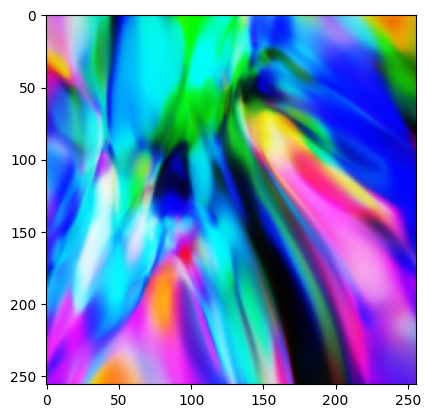

In [78]:
display_image(get_img_array().detach().cpu())